In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from querychains import Context, start_server
from querychains.ext.pyplot import capture_figure

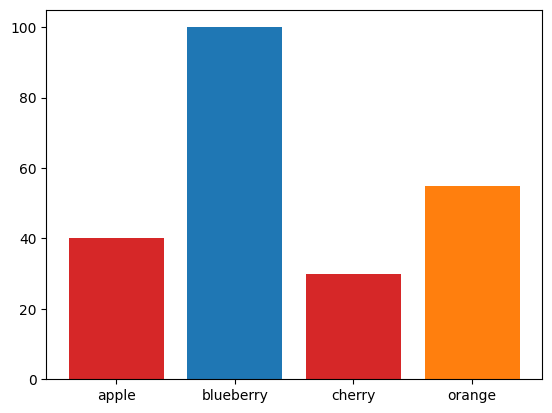

In [3]:
with Context("root") as root:
    with Context("first", meta={"color": "lightgreen"}):
        pass
    with Context("second", meta={"color": "lightblue"}):
        pass        

    fig, ax = plt.subplots()
    
    fruits = ['apple', 'blueberry', 'cherry', 'orange']
    counts = [40, 100, 30, 55]
    bar_labels = ['red', 'blue', '_red', 'orange']
    bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
    
    ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
    
    with Context("image demo", inputs={"my_chart": capture_figure(), "other_param": 42}) as root2:
        pass

In [5]:
server = start_server(port=5000)
server.add_context(root)
server.add_context(root2)

INFO:     Started server process [17843]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('127.0.0.1', 5000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
Task exception was never retrieved
future: <Task finished name='Task-19' coro=<Server.serve() done, defined at /home/ada/.cache/pypoetry/virtualenvs/querychains-3RHuJ6Rv-py3.10/lib/python3.10/site-packages/uvicorn/server.py:63> exception=SystemExit(1)>
Traceback (most recent call last):
  File "/home/ada/.cache/pypoetry/virtualenvs/querychains-3RHuJ6Rv-py3.10/lib/python3.10/site-packages/uvicorn/server.py", line 161, in startup
    server = await loop.create_server(
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1505, in create_server
    raise OSError(err.errno, 'error while attempting '
OSError: [Errno 98] error while attempting to bind on address ('127.0.0.1', 5